# Actividad 16.1
## Eliú Moreno Ramírez

Dada la siguiente ecuación diferencial 


$\frac{\partial ²u}{\partial x²}=c\frac{\partial u}{\partial t}$   

$ 0< x <2 $

$t>=0 $
    
$\frac{\partial u(2,t)}{\partial x}=5 ,$ $   t>=0$

$u(x,1)=25sin(x)
$ 0<x<2 $

$ u(0,t)=10t, $ $ t>=0 $

$\Delta x=0.5, c=1.6$

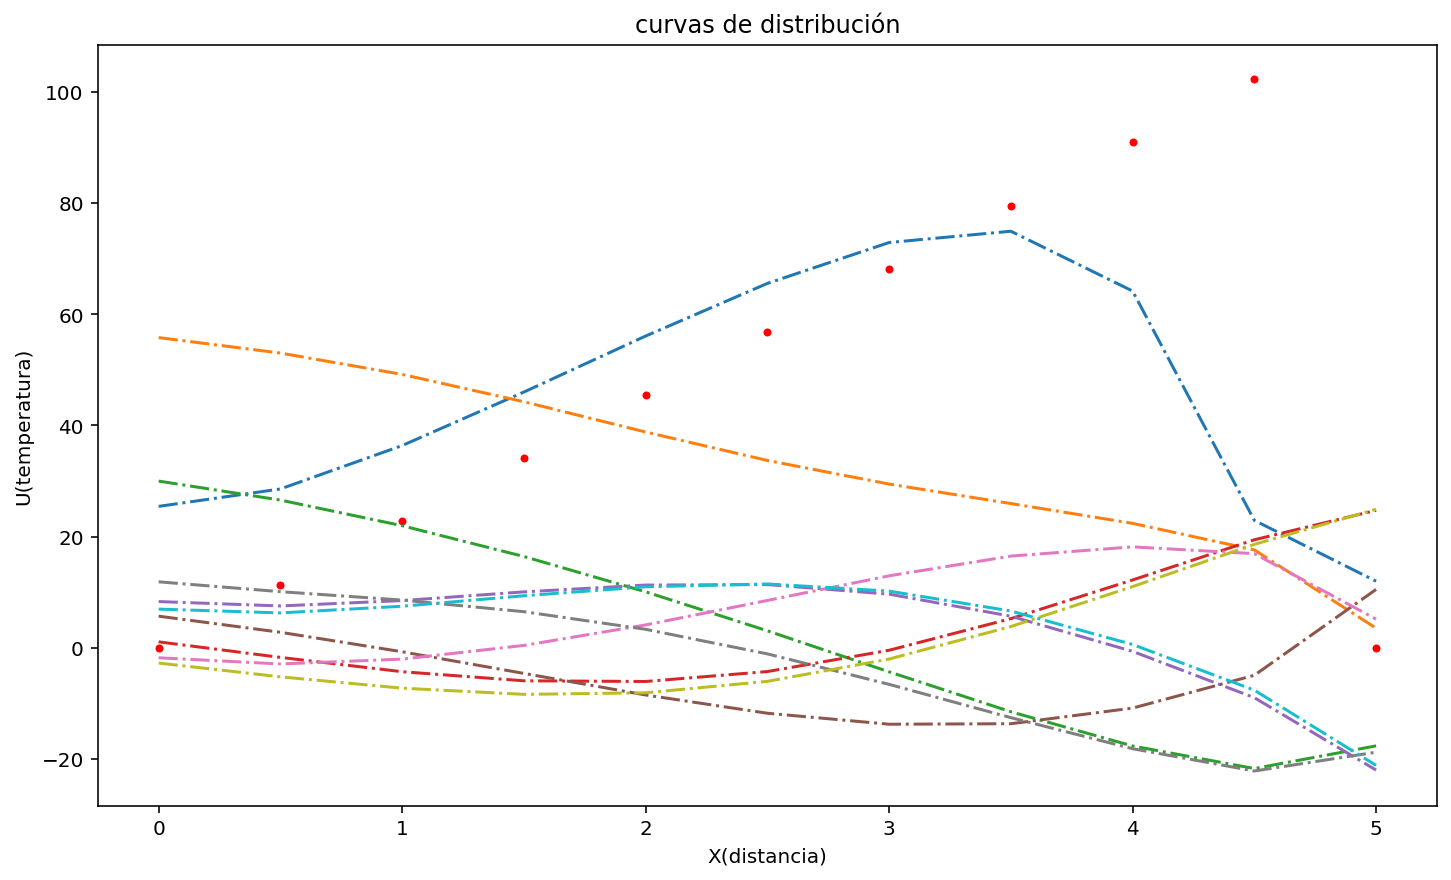

In [ ]:
from tridiagonal import*
import numpy as np
def edpdifpid(P,Q,R,U,der0,dx,m):
    #Método de diferencias finitas  implicito
    a=[];b=[];c=[];d=[]
    for i in range(m-1):
        a=a+[P]
        b=b+[Q]
        c=c+[R]
        d=d+[-U[i+1]]
    c[0]=P+R
    d[0]=d[0]+2*dx*P*der0
    d[m-2]=d[m-2]-c[m-2]*U[m-1]
    u=tridiagonal(a,b,c,d)
    U=u
    return U

m=11      #numero de ecuaciones m-1
n=50       #numero de niveles en t
der0=-5    #derivada en el borde izquierdo
L=2        # longitud
#t=np.arange(0,50,50)
#x=np.arange(0,1,11)
#Tb=20+10*np.sin(t)      #condiciones en los bordes
#To=40*x      #condiciones en el inicio
dx=0.5    #incrementos
dt=0.5
k=1.6        #dato especificado
U=[]       #asignacion incial

for i in range(m-1):
    U=U+[22.7324*i*dx]
U=U+[0]
#print(U)
lamb=dt/(k*dx**2)
P=lamb
Q=-1-2*lamb
R=lamb

import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,1)
ax.set_title('curvas de distribución')
ax.set_xlabel('X(distancia)')
ax.set_ylabel('U(temperatura)')
x=[]
for i in range(m):
    x=x+[i*dx]          # coordenadas para el gráfico
ax.plot(x,U,'.r')          #distribución inicial
for j in range(n):
    U=edpdifpid(P,Q,R,U,der0,dx,m)
    #print(U)
    U=U+[25*np.sin((j+1)*dt)]
    if j%5==0:
        ax.plot(x,U,'-.')